# Dataset: Acct97.txt

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import re

In [2]:
df = pd.read_csv(r'C:\Users\pdearria\OneDrive - NTT DATA EMEAL\PabloA\Data Strategy\DQ_landing\spss\acct97.txt',sep=',', encoding='iso-8859-1')

df.head()

,ID,ACCOUNT,OPEN_BAL,CURR_BAL,OPENDATE,ACCTNO
0,ID12701,SAVE,1000.0,1005.32,11/2/1997,SA 12701 53549
1,ID12702,SAVE,100.0,144.51,20/5/1997,SA 12702 18333
2,ID12703,SAVE,300.0,321.20,20/7/1997,SA 12703 30343
3,ID12703,CURRENT,150.0,-204.51,23/5/1997,CU 12703 75336
4,ID12704,SAVE,2000.0,2022.02,7/3/1997,SA 12704 14721


Exportación a parquet

In [4]:
# exporta el DataFrame a parquet
df.to_parquet(r'C:\Users\pdearria\OneDrive - NTT DATA EMEAL\PabloA\Data Strategy\DQ_landing\spss\acct97.parquet', engine='pyarrow')

# Prueba de lectura
df_parquet = pd.read_parquet(r'C:\Users\pdearria\OneDrive - NTT DATA EMEAL\PabloA\Data Strategy\DQ_landing\spss\acct97.parquet', engine='pyarrow')
df_parquet.head()

,ID,ACCOUNT,OPEN_BAL,CURR_BAL,OPENDATE,ACCTNO
0,ID12701,SAVE,1000.0,1005.32,11/2/1997,SA 12701 53549
1,ID12702,SAVE,100.0,144.51,20/5/1997,SA 12702 18333
2,ID12703,SAVE,300.0,321.20,20/7/1997,SA 12703 30343
3,ID12703,CURRENT,150.0,-204.51,23/5/1997,CU 12703 75336
4,ID12704,SAVE,2000.0,2022.02,7/3/1997,SA 12704 14721


In [7]:
# cantidad de registros
df['ID'].size

162

Exploratorios con univariados

In [26]:
# variables continuas

df.describe(percentiles=[0.01, 0.03, 0.05, 0.25, 0.75, 0.95, 0.97, 0.99], include='number')

,OPEN_BAL,CURR_BAL
count,162.000000,162.000000
mean,663.060637,685.337840
std,934.439992,955.096339
min,1.000000,-1200.200000
1%,1.000000,-273.197200
3%,5.000000,-82.897100
5%,10.222385,26.648000
25%,101.439750,140.580000
50%,242.430500,305.820000
75%,1003.787500,1058.325000


In [8]:
# comprueba si el saldo negativo se da enn todos los tipos de cuenta o solo en uno
df.groupby('ACCOUNT').describe(percentiles=[0.01, 0.03, 0.05, 0.25, 0.75, 0.95, 0.97, 0.99], include='number').stack()

OPEN_BAL     CURR_BAL
ACCOUNT                                
CURRENT count    93.000000    93.000000
        mean    745.370355   746.823441
        std     950.307404   986.588287
        min       1.000000 -1200.200000
        1%        4.680000  -433.490400
        3%       14.867448  -206.629200
        5%       22.974120   -89.022000
        25%     109.067000   133.360000
        50%     314.068000   359.130000
        75%    1099.470000  1123.280000
        95%    2484.000000  2497.496000
        97%    2812.511600  2836.483200
        99%    4545.792000  4616.968400
        max    5072.400000  5103.630000
SAVE    count    69.000000    69.000000
        mean    552.121452   602.465942
        std     907.636302   911.458101
        min       1.000000     1.430000
        1%        1.000000     7.631600
        3%        5.000000    26.877600
        5%        6.287208    46.476000
        25%      99.554000   144.510000
        50%     229.416000   287.800000
        75%     580.884000   610.970000
        95%    2073.200000  2139.878000
        97%    2314.691200  2368.037200
        99%    4679.332400  4710.469600
        max    5000.000000  5095.030000

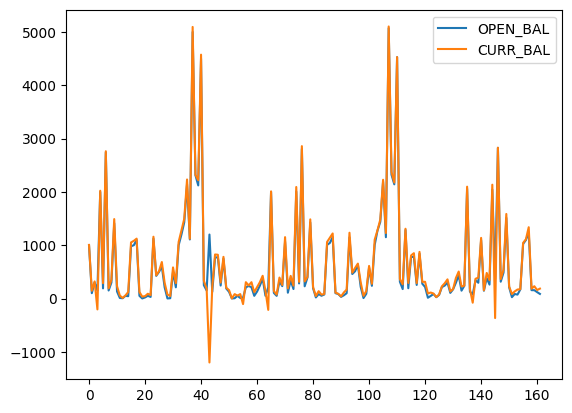

In [4]:
# graficos
df[['OPEN_BAL', 'CURR_BAL']].plot()
plt.show()

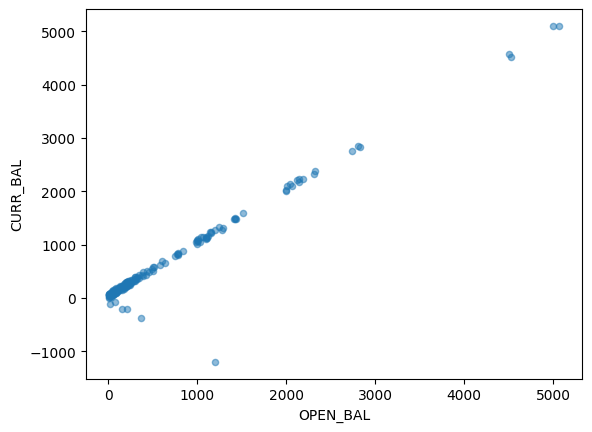

In [7]:
df[['OPEN_BAL', 'CURR_BAL']].plot.scatter(x='OPEN_BAL', y='CURR_BAL', alpha=0.5)
plt.show()

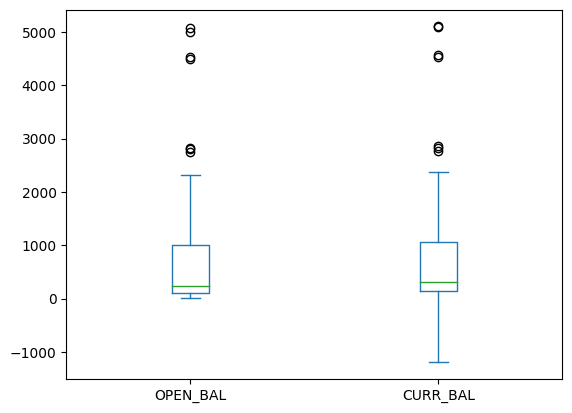

In [11]:
df[['OPEN_BAL', 'CURR_BAL']].plot.box()
plt.show()

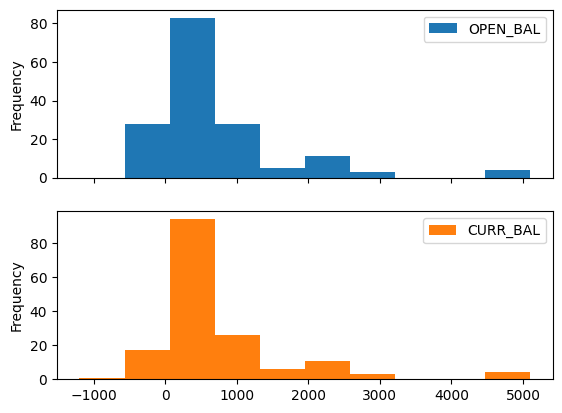

In [15]:
df[['OPEN_BAL', 'CURR_BAL']].plot.hist(subplots=True)
plt.show()

In [25]:
# variables categoricas
df.describe(include='object')

,ID,ACCOUNT,OPENDATE,ACCTNO
count,162,162,162,162
unique,94,2,61,162
top,ID12750,CURRENT,7/3/1997,SA 12701 53549
freq,3,93,5,1


In [32]:
# numero de elementos: filas x columnas
df['ID'].size

162

In [27]:
# recuento de valores con opción a contar nulos
df['ACCOUNT'].value_counts(dropna = False)

ACCOUNT
CURRENT    93
SAVE       69
Name: count, dtype: int64

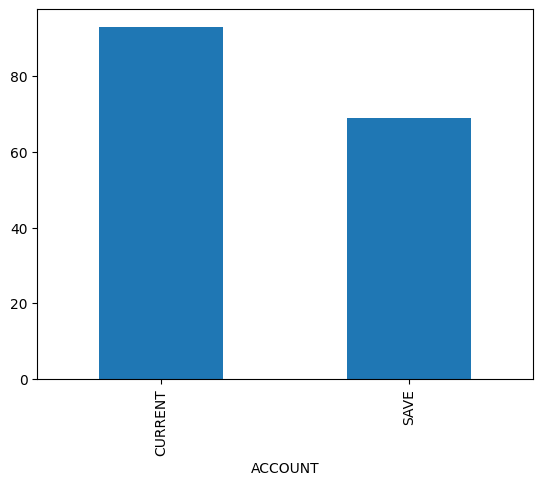

In [29]:
# graficos
df.groupby('ACCOUNT')['ACCOUNT'].count().plot.bar()

plt.show()

In [36]:
df[59:60]

,ID,ACCOUNT,OPEN_BAL,CURR_BAL,OPENDATE,ACCTNO
59,ID12737,CURRENT,50.0,119.51,30/2/1997,CU 12737 71475


In [71]:
# variables de fecha: convertir a datetime o timestamp
df['OPENDATE_ts'] = pd.to_datetime(df['OPENDATE'], format='mixed', dayfirst=True, errors='coerce')
df.head(10)

,ID,ACCOUNT,OPEN_BAL,CURR_BAL,OPENDATE,ACCTNO,OPENDATE_ts
0,ID12701,SAVE,1000.0,1005.32,11/2/1997,SA 12701 53549,1997-02-11
1,ID12702,SAVE,100.0,144.51,20/5/1997,SA 12702 18333,1997-05-20
2,ID12703,SAVE,300.0,321.20,20/7/1997,SA 12703 30343,1997-07-20
3,ID12703,CURRENT,150.0,-204.51,23/5/1997,CU 12703 75336,1997-05-23
4,ID12704,SAVE,2000.0,2022.02,7/3/1997,SA 12704 14721,1997-03-07
5,ID12705,SAVE,190.0,287.80,6/9/1997,SA 12705 99830,1997-09-06
6,ID12705,CURRENT,2742.0,2762.99,14/5/1997,CU 12705 22554,1997-05-14
7,ID12705,CURRENT,150.0,191.09,12/6/1997,CU 12705 73700,1997-06-12
8,ID12706,SAVE,300.0,353.69,31/1/1997,SA 12706 28968,1997-01-31
9,ID12706,CURRENT,1412.0,1490.11,4/2/1997,CU 12706 23794,1997-02-04


In [72]:
# resumenes
df['OPENDATE_ts'].describe()

count                    160
mean     1997-06-16 22:21:00
min      1997-01-16 00:00:00
25%      1997-03-10 00:00:00
50%      1997-05-29 00:00:00
75%      1997-09-05 00:00:00
max      1997-12-24 00:00:00
Name: OPENDATE_ts, dtype: object

In [69]:
# para revisar los que no pudieron convertir y quedaron en nulos
df[df['OPENDATE_ts'].isna()]

,ID,ACCOUNT,OPEN_BAL,CURR_BAL,OPENDATE,ACCTNO,OPENDATE_ts
59,ID12737,CURRENT,50.000,119.51,30/2/1997,CU 12737 71475,NaT
119,ID12772,SAVE,277.143,312.59,30/2/1997,SA 12772 92791,NaT


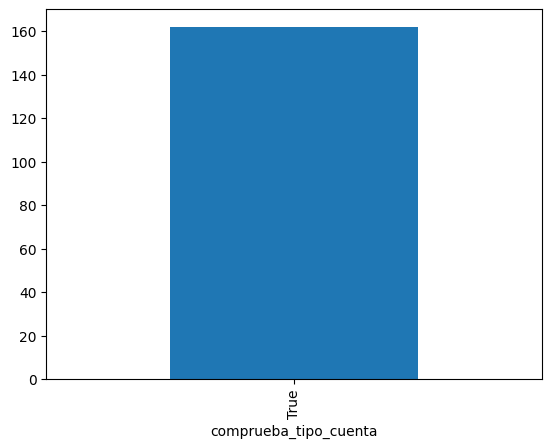

In [18]:
# comprueba si el numero de cuenta esta bien asignado segun el tipo de cuenta
df['comprueba_tipo_cuenta'] = df['ACCOUNT'].astype('string').str.slice(0,2) == df['ACCTNO'].astype('string').str.slice(0,2)
df.groupby('comprueba_tipo_cuenta')['comprueba_tipo_cuenta'].count().plot.bar()
plt.show()

In [3]:
df['comprueba_acctno'] = df['ACCTNO'].astype('string').str.match(r'^[A-Z]{2}\s\d{5}\s\d{5}$')
df['comprueba_id'] = df['ID'].astype('string').str.match(r'^[A-Z]{2}\d{5}$')
df.head(10)

,ID,ACCOUNT,OPEN_BAL,CURR_BAL,OPENDATE,ACCTNO,comprueba_acctno,comprueba_id
0,ID12701,SAVE,1000.0,1005.32,11/2/1997,SA 12701 53549,True,True
1,ID12702,SAVE,100.0,144.51,20/5/1997,SA 12702 18333,True,True
2,ID12703,SAVE,300.0,321.20,20/7/1997,SA 12703 30343,True,True
3,ID12703,CURRENT,150.0,-204.51,23/5/1997,CU 12703 75336,True,True
4,ID12704,SAVE,2000.0,2022.02,7/3/1997,SA 12704 14721,True,True
5,ID12705,SAVE,190.0,287.80,6/9/1997,SA 12705 99830,True,True
6,ID12705,CURRENT,2742.0,2762.99,14/5/1997,CU 12705 22554,True,True
7,ID12705,CURRENT,150.0,191.09,12/6/1997,CU 12705 73700,True,True
8,ID12706,SAVE,300.0,353.69,31/1/1997,SA 12706 28968,True,True
9,ID12706,CURRENT,1412.0,1490.11,4/2/1997,CU 12706 23794,True,True


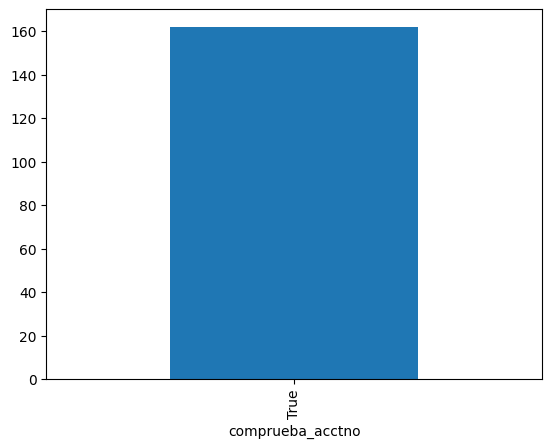

In [22]:
df.groupby('comprueba_acctno')['comprueba_acctno'].count().plot.bar()
plt.show()

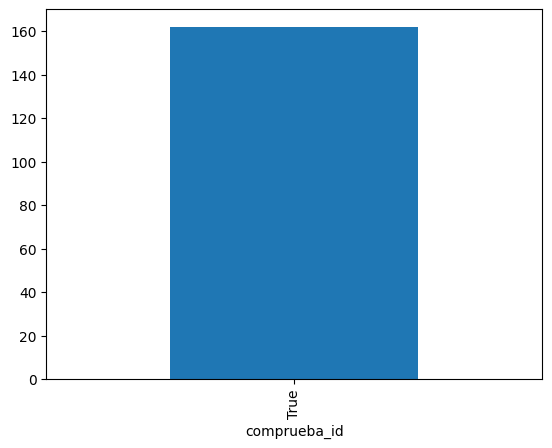

In [4]:
df.groupby('comprueba_id')['comprueba_id'].count().plot.bar()
plt.show()